# MNIST: Predicting Hand written digits using CNN

**Author:** Soutik Chakraborty (soutikc@gmail.com)

We will try to predict the handwritten digits in the MNIST dataset using tensorflow via Keras APIs and find our the accuracy of our prediction

In [101]:
# Load the required libraries
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
if K.tensorflow_backend._get_available_gpus() == []:
    print "No GPU available on this machine"
else:
    print "Process will be GPU accelerated"
    
print "All modules loaded"

No GPU available on this machine
All modules loaded


## Load Data

Load the data from tensorFlow library and check what the images and corresponding labels look like

In [46]:
# Load the MNIST data from tf example datasets
mnist = input_data.read_data_sets(".", one_hot=False)

# One hot encode the training and test labels
encoder = OneHotEncoder()
train_labels_one_hot = encoder.fit_transform(mnist.train.labels.reshape(-1,1)).toarray()
test_labels_one_hot = encoder.fit_transform(mnist.test.labels.reshape(-1,1)).toarray()

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


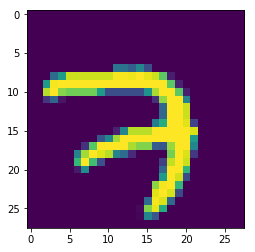

Actual label is : 7
One Hot encoded label is :  [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


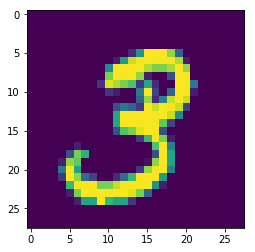

Actual label is : 3
One Hot encoded label is :  [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


In [48]:
# Look at the data and the labels - both original and onehot encoded labels
plt.imshow(mnist.train.images[0].reshape([28, 28]))
plt.show()
print "Actual label is :", mnist.train.labels[0]
print "One Hot encoded label is : ", train_labels_one_hot[0]

plt.imshow(mnist.train.images[1].reshape([28, 28]))
plt.show()
print "Actual label is :", mnist.train.labels[1]
print "One Hot encoded label is : ", train_labels_one_hot[1]

## Model Architecture

We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

- Conv2D - for the convolution layers
- Dropout - to prevent overfitting
- Dense - a fully connected layer 
- Softmax activation - This is used to convert all predictions into probability

The model architecture can be tuned to get optimal performance

In [90]:
# Reshape the images to follow a shape of (#of image, rows, columns, color_dim)
x_train = mnist.train.images.reshape(mnist.train.images.shape[0], 28, 28, 1)
x_test = mnist.test.images.reshape(mnist.test.images.shape[0], 28, 28, 1)

In [143]:
# Write the model architecture
model = keras.Sequential()
model.add(Conv2D(32, activation='relu', input_shape = (28, 28, 1), padding='same', kernel_size=(3,3)))
model.add(Conv2D(64, activation='relu', padding='same', kernel_size=(2,2)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu', input_shape = (256, )))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', input_shape = (16, )))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 64)        8256      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
__________

## Compile and train the model

In this we will try to compile the model architecture we created above and train the model on top of it. This will set all the weights for the model.

For trial and faster approaches we will try to run on 10 epochs of the training runs. To validate that your model is working, you should see that your accuracy is increasing and not decreasing with epochs

In [144]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

model.fit(x_train, train_labels_one_hot,
          batch_size=128,
          epochs=10,
          verbose=1)

Epoch 1/10
55000/55000 [==============================] - 99s 2ms/step - loss: 0.3096 - acc: 0.9069
Epoch 2/10
55000/55000 [==============================] - 101s 2ms/step - loss: 0.0882 - acc: 0.9739
Epoch 3/10
55000/55000 [==============================] - 101s 2ms/step - loss: 0.0593 - acc: 0.9823
Epoch 4/10
55000/55000 [==============================] - 95s 2ms/step - loss: 0.0464 - acc: 0.9860
Epoch 5/10
55000/55000 [==============================] - 96s 2ms/step - loss: 0.0388 - acc: 0.9883
Epoch 6/10
55000/55000 [==============================] - 99s 2ms/step - loss: 0.0338 - acc: 0.9893
Epoch 7/10
55000/55000 [==============================] - 95s 2ms/step - loss: 0.0279 - acc: 0.9915
Epoch 8/10
55000/55000 [==============================] - 96s 2ms/step - loss: 0.0243 - acc: 0.9927
Epoch 9/10
55000/55000 [==============================] - 97s 2ms/step - loss: 0.0221 - acc: 0.9933
Epoch 10/10
55000/55000 [==============================] - 97s 2ms/step - loss: 0.0188 - acc: 0.99

Tuning the model architecture and running more epochs are the way to make your model much more accuracte. Feel free to play around with these and try how your model behaves.

## Test Performance

We will now see how our model performs with the test data

In [145]:
score = model.evaluate(x_test, test_labels_one_hot, verbose=0)
print "Test Loss is : ", score[0]
print "Test Accurary is : ", score[1]

Test Loss is :  0.0300701259452
Test Accurary is :  0.9896


We got a fairly good accuracy with our test data of **99%.**

Let us randomly check 2 images and see how our model did vs the actual labels.

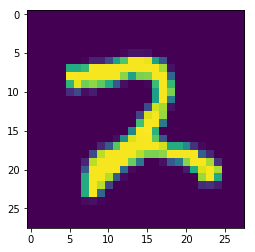

Actual label is : 2
Predicted Label is : 2


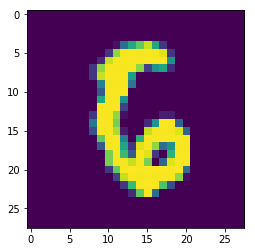

Actual label is : 6
Predicted Label is : 6


In [146]:
# Random image selection Number 1
image_ind = np.random.randint(0, x_test.shape[0])
pred = model.predict(x_test[image_ind].reshape(1, 28, 28, 1)).tolist()[0]

# Look at the data and the labels - both original and onehot encoded labels
plt.imshow(x_test[image_ind].reshape([28, 28]))
plt.show()
print "Actual label is :", mnist.test.labels[image_ind]
print "Predicted Label is :", pred.index(max(pred))

# Random image selection Number 2
image_ind = np.random.randint(0, x_test.shape[0])
pred = model.predict(x_test[image_ind].reshape(1, 28, 28, 1)).tolist()[0]

# Look at the data and the labels - both original and onehot encoded labels
plt.imshow(x_test[image_ind].reshape([28, 28]))
plt.show()
print "Actual label is :", mnist.test.labels[image_ind]
print "Predicted Label is :", pred.index(max(pred))